# My first Chatbot with Langgraph

In [1]:
from typing_extensions import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

api_key = os.getenv("GroqAPI")
llm = ChatGroq(model="llama-3.3-70b-versatile", api_key=api_key)

In [5]:
#node functionality
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

In [6]:
graph_builder=StateGraph(State)
## its a chatbot node 
graph_builder.add_node("Myllm Chatbot",chatbot)
## these are the edges start and end

graph_builder.add_edge(START, "Myllm Chatbot")
graph_builder.add_edge("Myllm Chatbot", END)

## compile the graph
graph=graph_builder.compile()
graph_builder=StateGraph(State)

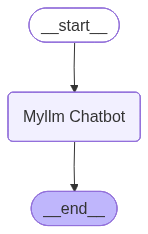

In [7]:
##visualize the Graph

from IPython.display import Image,display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [8]:
response=graph.invoke({"messages":"Hi"})

In [9]:
response["messages"][-1].content

"It's nice to meet you. Is there something I can help you with or would you like to chat?"